# Tratamiento de Valores Nulos

### Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importar los datos

In [2]:
ruta = '../data/calidad_aire_2022.csv'
ruta_nuevoCSV = '../data/calidad_aire_2022_clean_nulos.csv'
data = pd.read_csv(ruta, delimiter=',', engine='python', index_col=0)
data.head()

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD
FECHA,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019.0,1.0,1.0,0,Martes,8.0,13.0,0.7,79.0,24.0,32.0,3.84,6.4,6.9,50.0
2019-01-01 01:00:00,2019.0,1.0,1.0,1,Martes,8.0,13.0,0.6,76.0,33.0,105.0,3.61,4.9,6.7,48.0
2019-01-01 02:00:00,2019.0,1.0,1.0,2,Martes,8.0,12.0,0.6,85.0,34.0,91.0,3.73,5.2,6.1,51.0
2019-01-01 03:00:00,2019.0,1.0,1.0,3,Martes,8.0,10.0,0.6,81.0,29.0,43.0,3.64,5.0,4.4,56.0
2019-01-01 04:00:00,2019.0,1.0,1.0,4,Martes,8.0,9.0,0.5,68.0,23.0,31.0,5.28,3.8,4.9,51.0


#### Cantidad de Registros Importados

In [3]:
data.shape

(30240, 15)

#### Identificación de los tipos de columnas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30240 entries, 2019-01-01 00:00:00 to 2023-05-31 23:00:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANO          30240 non-null  float64
 1   MES          30240 non-null  float64
 2   DIA          30240 non-null  float64
 3   HORA         30240 non-null  int64  
 4   DIA_SEMANA   30240 non-null  object 
 5   ESTACION     30240 non-null  float64
 6   SO2          29580 non-null  float64
 7   CO           29749 non-null  float64
 8   NO2          29822 non-null  float64
 9   PM2.5        28786 non-null  float64
 10  PM10         28760 non-null  float64
 11  O3           29407 non-null  float64
 12  BTX          30240 non-null  float64
 13  TEMPERATURA  29778 non-null  float64
 14  HUMEDAD      29729 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 3.7+ MB


### Estadística Descriptiva

In [5]:
##estadísticas descriptivas
data.describe().round(1)

,ANO,MES,DIA,HORA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD
count,30240.0,30240.0,30240.0,30240.0,30240.0,29580.0,29749.0,29822.0,28786.0,28760.0,29407.0,30240.0,29778.0,29729.0
mean,2020.4,5.9,15.8,11.5,8.0,5.7,0.3,39.7,9.7,19.1,47.7,3.5,15.7,55.4
std,1.3,3.5,8.8,6.9,0.0,3.3,0.2,26.1,8.1,15.1,28.8,4.0,8.2,21.9
min,2019.0,1.0,1.0,0.0,8.0,1.0,0.1,3.0,0.0,1.0,0.8,0.0,-55.0,-25.0
25%,2019.0,3.0,8.0,5.8,8.0,3.0,0.2,20.0,4.0,9.0,25.2,1.4,9.6,38.0
50%,2020.0,5.0,16.0,11.5,8.0,5.0,0.3,34.0,8.0,15.0,47.5,2.5,14.5,54.0
75%,2021.0,9.0,23.0,17.2,8.0,8.0,0.4,53.0,13.0,25.0,66.7,4.3,21.2,72.0
max,2023.0,12.0,31.0,23.0,8.0,35.0,2.9,279.0,106.0,211.0,158.0,150.6,42.5,100.0


### Tratamiento Nulos

####  1. Identifica valores nulos

In [6]:
data.isnull().sum()

ANO               0
MES               0
DIA               0
HORA              0
DIA_SEMANA        0
ESTACION          0
SO2             660
CO              491
NO2             418
PM2.5          1454
PM10           1480
O3              833
BTX               0
TEMPERATURA     462
HUMEDAD         511
dtype: int64

#####  1.1. Identifica si hay valores nulos en TODAS las columnas del dataframe "data"

In [7]:
datos_seleccionados = data
for columna in datos_seleccionados:
    if datos_seleccionados[columna].isnull().any():
        print(f"La columna {columna} tiene valores nulos.")

La columna SO2 tiene valores nulos.
La columna CO tiene valores nulos.
La columna NO2 tiene valores nulos.
La columna PM2.5 tiene valores nulos.
La columna PM10 tiene valores nulos.
La columna O3 tiene valores nulos.
La columna TEMPERATURA tiene valores nulos.
La columna HUMEDAD tiene valores nulos.


#####  1.2. Visualización de los valores nulos en la gráfica

<Axes: >

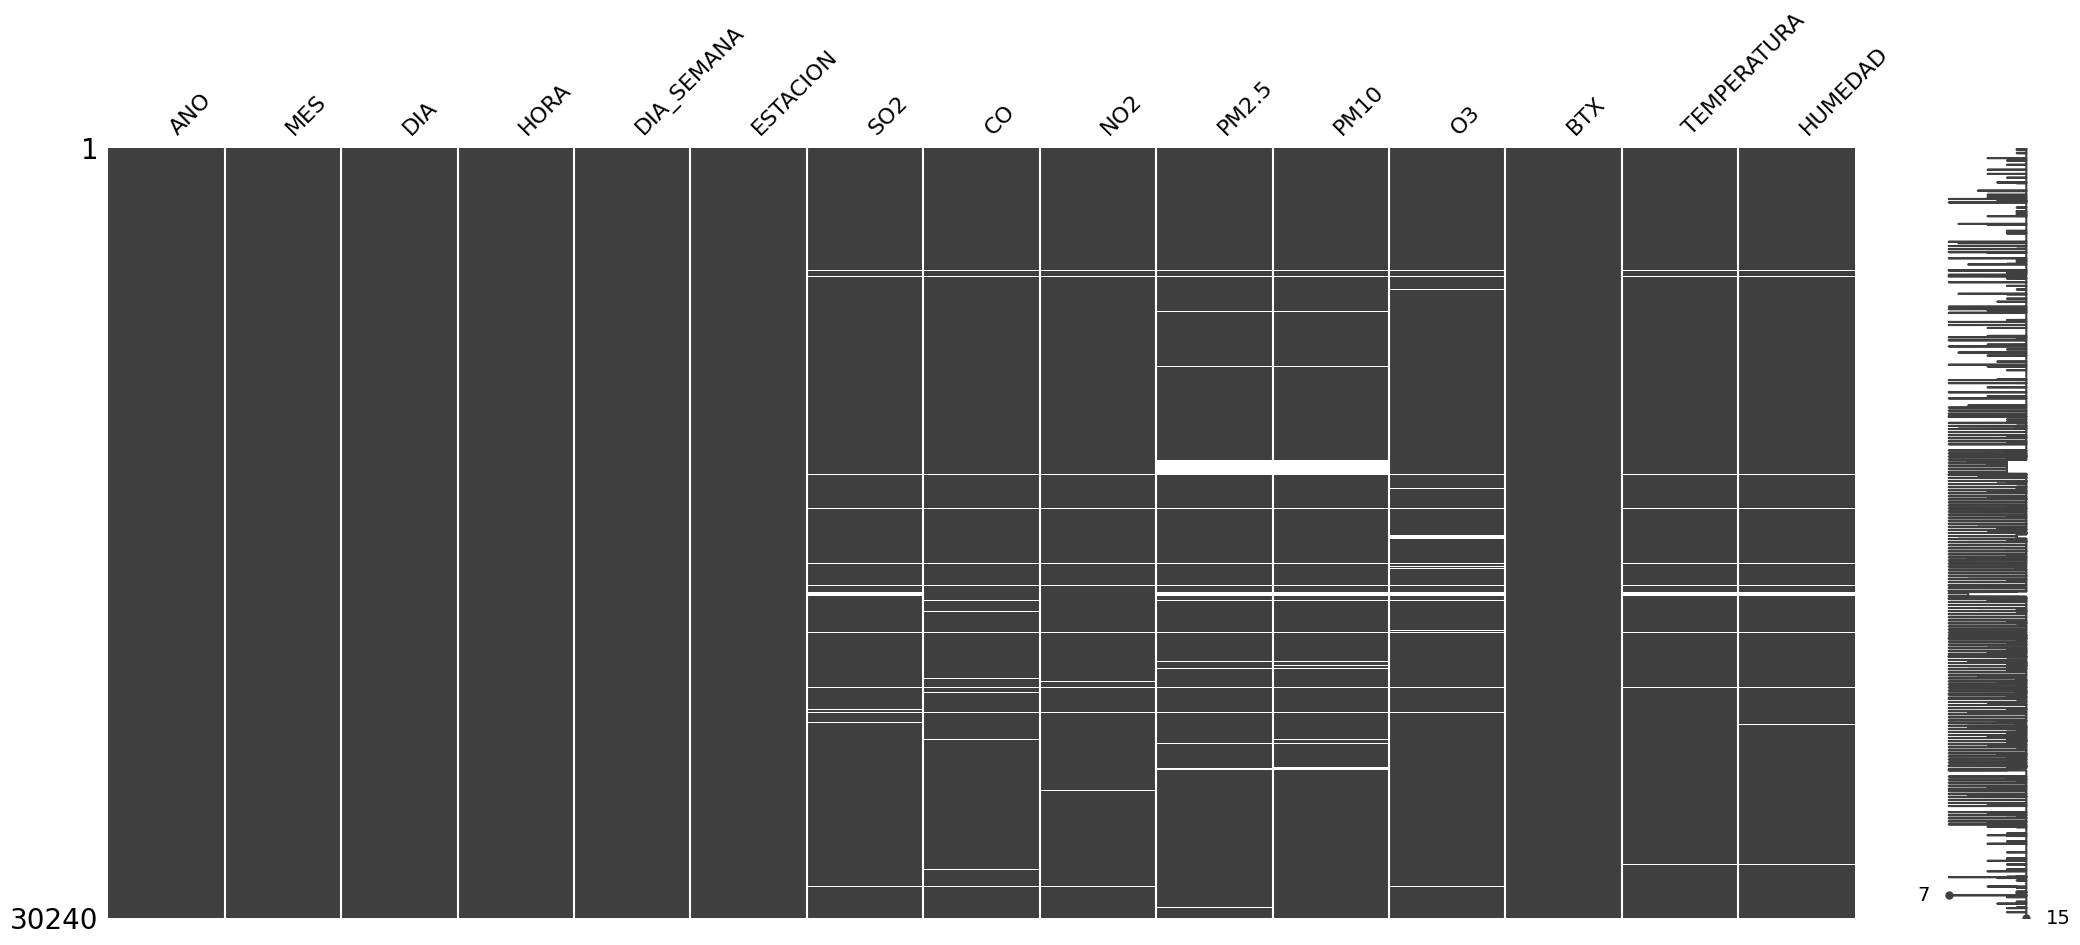

In [8]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

#####  1.3. Rellena las columnas que contienen valor nulo con la mediana y crea un nuevo DataFrame.

In [9]:
# función que recibe una lista de columnas, calcula la mediana
def nulos(dataframe, columns):
    resultado = pd.DataFrame(columns=['Columna', 'Valor_mediana'])
    
    for col in columns:
        median_value = dataframe[col].median()
        dataframe[col] = dataframe[col].fillna(median_value)

        resultado = pd.concat([resultado, pd.DataFrame({
            'Columna': [col],
            'Valor_mediana': [median_value]
        })], ignore_index=True)
    df_cuartil = resultado       
    return resultado

#####  1.4. Selecciona solamente aquellas columnas que se quiere calcular la mediana

In [11]:
data.columns

Index(['ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2', 'CO',
       'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD'],
      dtype='object')

In [12]:
data_nulos = data
numeric_columns = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD'] # Lista de columnas

resultado = nulos(data_nulos, numeric_columns)
print(resultado)

       Columna  Valor_mediana
0          SO2           5.00
1           CO           0.30
2          NO2          34.00
3        PM2.5           8.00
4         PM10          15.00
5           O3          47.47
6          BTX           2.50
7  TEMPERATURA          14.50
8      HUMEDAD          54.00


In [13]:
data_nulos.head()

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD
FECHA,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019.0,1.0,1.0,0,Martes,8.0,13.0,0.7,79.0,24.0,32.0,3.84,6.4,6.9,50.0
2019-01-01 01:00:00,2019.0,1.0,1.0,1,Martes,8.0,13.0,0.6,76.0,33.0,105.0,3.61,4.9,6.7,48.0
2019-01-01 02:00:00,2019.0,1.0,1.0,2,Martes,8.0,12.0,0.6,85.0,34.0,91.0,3.73,5.2,6.1,51.0
2019-01-01 03:00:00,2019.0,1.0,1.0,3,Martes,8.0,10.0,0.6,81.0,29.0,43.0,3.64,5.0,4.4,56.0
2019-01-01 04:00:00,2019.0,1.0,1.0,4,Martes,8.0,9.0,0.5,68.0,23.0,31.0,5.28,3.8,4.9,51.0


Verifica si todavia hay valores nulos para las columnas selecionadas

In [14]:
data_nulos.isnull().sum()

ANO            0
MES            0
DIA            0
HORA           0
DIA_SEMANA     0
ESTACION       0
SO2            0
CO             0
NO2            0
PM2.5          0
PM10           0
O3             0
BTX            0
TEMPERATURA    0
HUMEDAD        0
dtype: int64

#####  1.4. Genera el CSV después del pocesamiento de los valores nulos

In [21]:
data_nulos.to_csv(ruta_nuevoCSV, index=False)